<a href="https://colab.research.google.com/github/srinidhiKrishnan-17/DataScience/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [177]:
from zipfile import ZipFile

In [178]:
with ZipFile('/content/drive/MyDrive/Fake News Detection-20230219T132242Z-001.zip','r') as zobj:
  zobj.extractall('/content/drive/MyDrive/Colab Notebooks/Fake News Detection Dataset')

In [179]:
import os

In [180]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Fake News Detection Dataset')

['Fake News Detection']

In [181]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Fake News Detection Dataset/Fake News Detection')

['True.csv', 'Fake.csv']

In [182]:
import pandas as pd

In [183]:
true_csv =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake News Detection Dataset/Fake News Detection/True.csv')
fake_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake News Detection Dataset/Fake News Detection/Fake.csv')

In [184]:
true_csv.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [185]:
fake_csv.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [186]:
true_csv['Label']=0
fake_csv['Label']=1

In [187]:
true_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   Label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [188]:
fake_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   Label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


# Dropping duplicates

In [189]:
true_csv.duplicated().sum()

206

In [190]:
fake_csv.duplicated().sum()

3

In [191]:
true_csv = true_csv.drop_duplicates()

In [192]:
true_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21211 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
 4   Label    21211 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 994.3+ KB


In [193]:
fake_csv = fake_csv.drop_duplicates()

In [194]:
fake_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
 4   Label    23478 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


# Generating training and testing data

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
true_train,true_test = train_test_split(true_csv,test_size=0.2)

In [197]:
type(true_test)

pandas.core.frame.DataFrame

In [198]:
print("shape of true_train -----> ",true_train.shape)
print("shape of true_test  -----> ",true_test.shape)

shape of true_train ----->  (16968, 5)
shape of true_test  ----->  (4243, 5)


In [199]:
fake_train,fake_test = train_test_split(fake_csv,test_size=0.2)
print("shape of fake_train -----> ",fake_train.shape)
print("shape of fake_test  -----> ",fake_test.shape)

shape of fake_train ----->  (18782, 5)
shape of fake_test  ----->  (4696, 5)


In [200]:
train_data = pd.concat([true_train,fake_train])
test_data = pd.concat([true_test,fake_test])

In [201]:
train_data = train_data.sample(frac=1).reset_index()
test_data = test_data.sample(frac=1).reset_index()

In [202]:
16968+18782

35750

In [203]:
4243+4696

8939

In [204]:
print("shape of train_data -----> ",train_data.shape)
print("shape of test_data  -----> ",test_data.shape)

shape of train_data ----->  (35750, 6)
shape of test_data  ----->  (8939, 6)


In [205]:
training_sentances=[]
training_labels=[]
testing_sentances=[]
testing_labels=[]

In [206]:
type(train_data)

pandas.core.frame.DataFrame

In [207]:
type(test_data)

pandas.core.frame.DataFrame

# NLP

In [208]:
train_data.head()

,index,title,text,subject,date,Label
0,2972,States' Medicaid spending to increase under Se...,NEW YORK (Reuters) - The now-delayed U.S. Sena...,politicsNews,"June 28, 2017",0
1,22160,"Trump, Liberal Hypocrisy & Humanity’s Future",21st Century Wire says Here s an epic discussi...,US_News,"March 19, 2017",1
2,9253,"U.S. lawmakers want more Iran sanctions, but c...",WASHINGTON (Reuters) - A senior U.S. senator s...,politicsNews,"June 7, 2016",0
3,460,Trump’s Second Favorite Sheriff Just Very Sud...,Milwaukee County Sheriff David Clarke seems li...,News,"August 31, 2017",1
4,13574,"Factbox: Who are Britain First, whose leader's...",LONDON (Reuters) - U.S. President Donald Trump...,worldnews,"November 29, 2017",0


In [209]:
train_data.drop(columns=['index'],inplace=True)

In [210]:
test_data.drop(columns=['index'],inplace=True)

In [211]:
training_sentances=[]
training_labels=[]
testing_sentances=[]
testing_labels=[]



for i in range(0,len(train_data)):
  sentance=train_data.iloc[i,1]
  training_sentances.append(sentance)
  label=train_data.iloc[i,4]
  training_labels.append(label)


In [212]:
training_sentances

['NEW YORK (Reuters) - The now-delayed U.S. Senate healthcare overhaul bill would boost state spending on Medicaid by $565 million in 2022, according to an independent report issued on Wednesday, while credit agencies said it would cause states to face downward pressure on their credit ratings.  Senate Republican leaders on Tuesday postponed the vote on the bill, which they hoped would take place before their July 4 recess. According to credit rating agencies Moody’s Investors Service and Fitch Ratings, the legislation would negatively impact states because of changes to the core funding of Medicaid and the phasing out of the Medicaid expansion plan. The Urban Institute, a Washington, D.C.-based think tank, issued a report on Wednesday estimating state Medicaid spending  would increase by $565 million in 2022 under the proposed  legislation. It also estimated federal funding for Medicaid, which funds medical care for the poor and indigent, would be $102.2 billion lower in that year. Th

In [213]:
len(training_sentances)

35750

In [214]:
len(training_labels)

35750

In [215]:
testing_sentances=[]
testing_labels=[]



for i in range(0,len(test_data)):
  sentance=test_data.iloc[i,1]
  testing_sentances.append(sentance)
  label=test_data.iloc[i,4]
  testing_labels.append(label)

In [216]:
len(testing_sentances)

8939

In [217]:
len(testing_labels)

8939

In [218]:
print("type of training_sentances",type(training_sentances))
print("type oftraining_labels",type(training_labels))

print("type of testing_sentances",type(testing_sentances))
print("type of testing_labels",type(testing_labels))

type of training_sentances <class 'list'>
type oftraining_labels <class 'list'>
type of testing_sentances <class 'list'>
type of testing_labels <class 'list'>


In [219]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [220]:
oov_token  = '#OOV'
max_length = 150
trunc_type = 'post'
pad_type   = 'pre'
vocab_size = 10000
embedding_dim = 16

#Tokenization ----> maps each word with a token/number -> apply on list only
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(training_sentances) #fit_on_text method accepts list


#Sequencing ----> converts dictionary to lists in form of sentances
training_sequences = tokenizer.texts_to_sequences(training_sentances)
testing_sequences = tokenizer.texts_to_sequences(testing_sentances)


In [221]:
type(training_sequences)

list

In [222]:
type(testing_sequences)

list

In [223]:

# Padding ----> converts all sentances into same shape by adding zeros.
padded_training_seq = pad_sequences(training_sequences, maxlen = max_length, padding = pad_type, truncating = trunc_type)
padded_testing_seq = pad_sequences(testing_sequences, maxlen = max_length, padding = pad_type, truncating = trunc_type)


In [224]:
type(padded_training_seq)

numpy.ndarray

In [225]:
type(padded_testing_seq)

numpy.ndarray

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


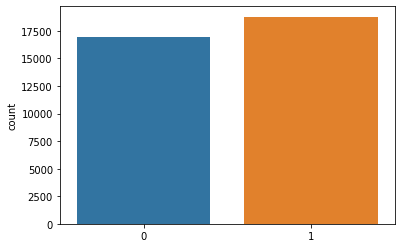

In [226]:
import seaborn as sns
sns.countplot(training_labels)

# **Training an LSTM Model**

In [227]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM

In [228]:
model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length)) 
#Embedding layer convert simple word token into vectors of 16 values...words having similar meaning their vectors lie close to each other in mutidimentional space.
model.add(Bidirectional(LSTM(32)))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 16)           160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 173,601
Trainable params: 173,601
Non-trainable params: 0
_________________________________________________________________


In [229]:
#compile the model
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [230]:
#fit the model
history = model.fit(
            padded_training_seq,
            training_labels,
            epochs = 10,
            validation_data = (padded_testing_seq, testing_labels)
)

Epoch 1/10
1118/1118 [==============================] - 50s 42ms/step - loss: 0.0882 - accuracy: 0.9673 - val_loss: 0.0231 - val_accuracy: 0.9866
Epoch 2/10
1118/1118 [==============================] - 20s 18ms/step - loss: 0.0083 - accuracy: 0.9968 - val_loss: 0.0076 - val_accuracy: 0.9987
Epoch 3/10
1118/1118 [==============================] - 19s 17ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0065 - val_accuracy: 0.9988
Epoch 4/10
1118/1118 [==============================] - 18s 16ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 5/10
1118/1118 [==============================] - 17s 15ms/step - loss: 0.0244 - accuracy: 0.9978 - val_loss: 0.0165 - val_accuracy: 0.9959
Epoch 6/10
1118/1118 [==============================] - 16s 15ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9987
Epoch 7/10
1118/1118 [==============================] - 18s 16ms/step - loss: 7.1632e-04 - accuracy: 0.9999 - val_loss: 0.00

# Visualizing Accuracy and loss

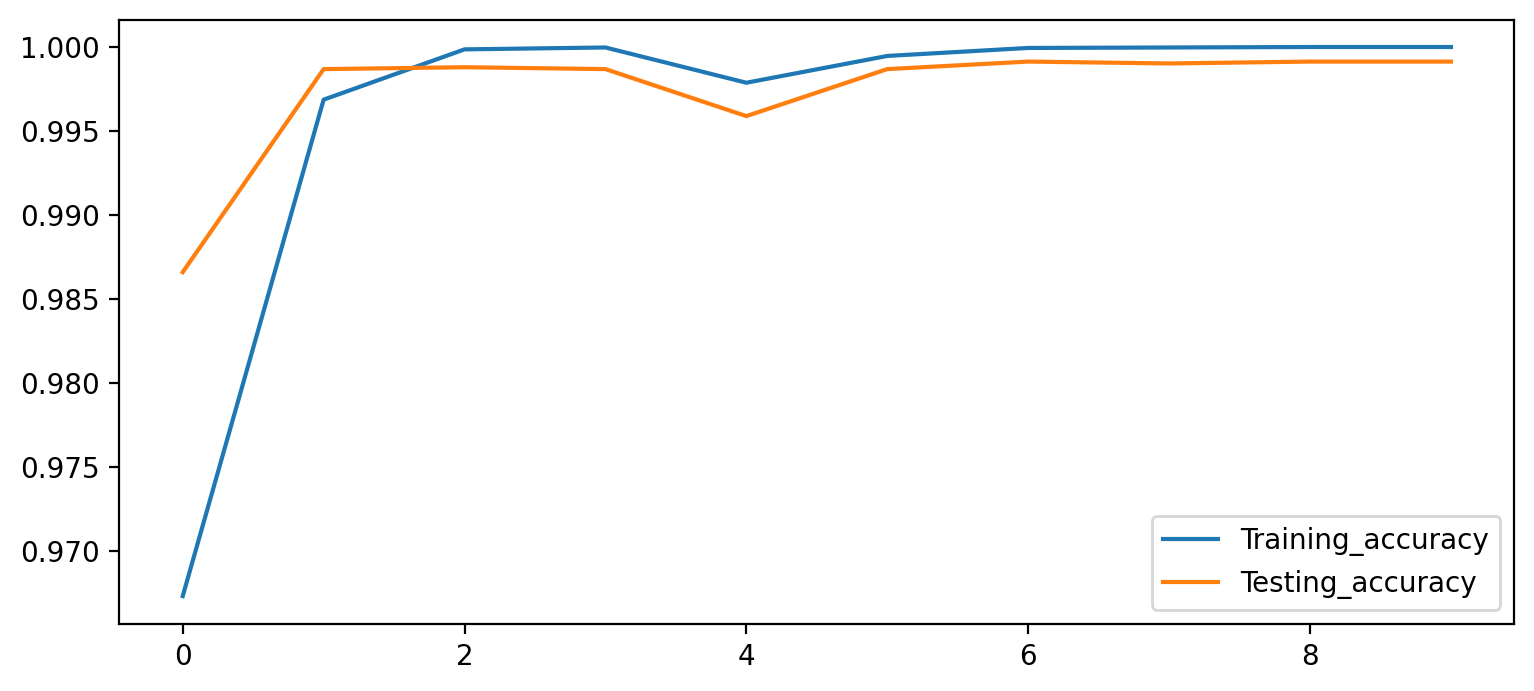

In [231]:
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']

plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_acc, label = 'Training_accuracy')
plt.plot(val_acc, label = 'Testing_accuracy')
plt.legend()

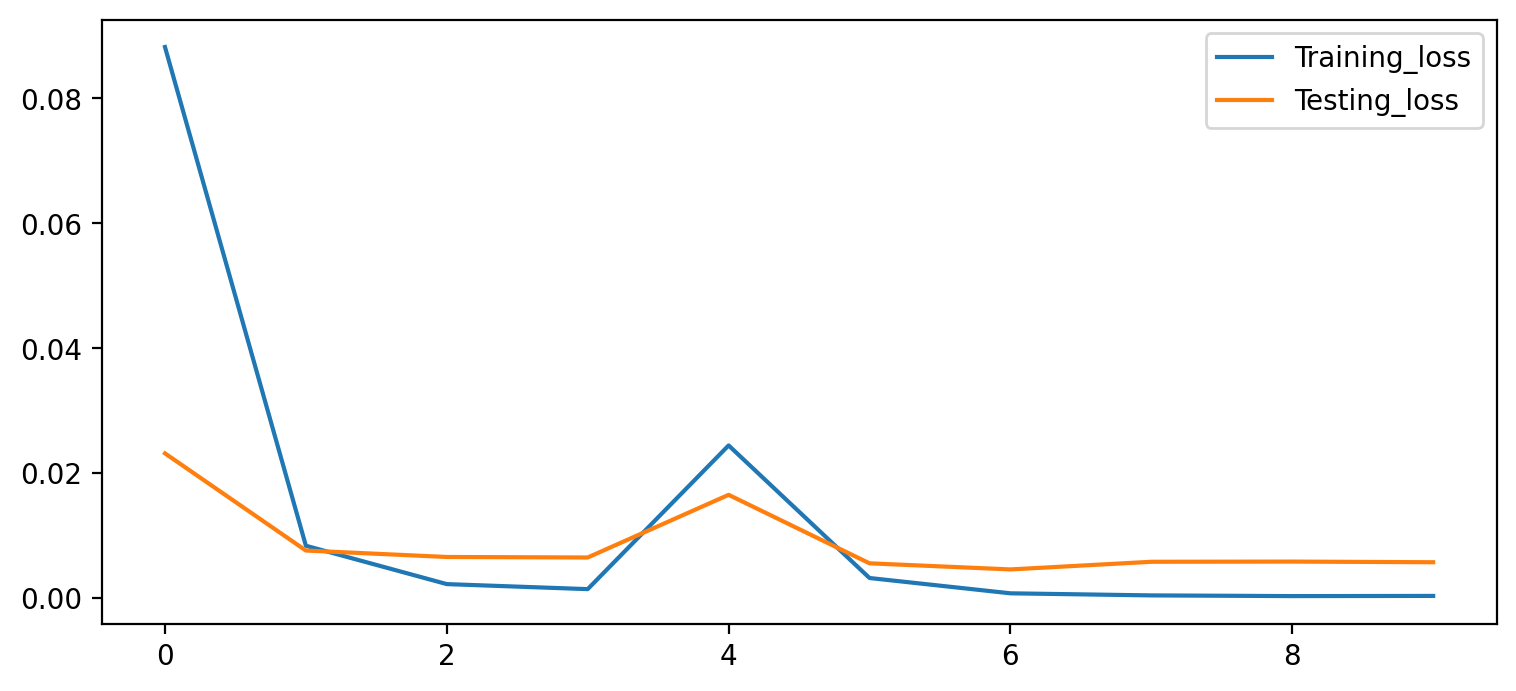

In [232]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_loss, label = 'Training_loss')
plt.plot(val_loss, label = 'Testing_loss')
plt.legend()

# Prediction Test

In [233]:
model.predict(padded_testing_seq[:15])

1/1 [==============================] - 1s 636ms/step


array([[9.9999821e-01],
       [2.6927069e-08],
       [3.4807218e-08],
       [9.9998057e-01],
       [9.9999988e-01],
       [9.9999952e-01],
       [4.3290052e-05],
       [2.3857960e-09],
       [1.3716330e-07],
       [9.9999988e-01],
       [1.5668530e-09],
       [1.6572967e-08],
       [9.9999785e-01],
       [9.9982774e-01],
       [9.9998879e-01]], dtype=float32)

In [236]:
testing_labels[:15]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])